In [106]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [107]:
file_time_a = '../Time Development/Data/time_a.csv'
file_time_b_decay = '../Time Development/Data/time_b_decay.csv'
file_time_b_normal = '../Time Development/Data/time_b_normal.csv'
file_time_b_growth = '../Time Development/Data/time_b_growth.csv'

time_a = pd.read_csv(file_time_a)
time_b_decay = pd.read_csv(file_time_b_decay)
time_b_normal = pd.read_csv(file_time_b_normal)
time_b_growth = pd.read_csv(file_time_b_growth)

In [108]:
time_b_growth["scenario"] = "growth"
time_b_decay["scenario"] = "decay"
time_b_normal["scenario"] = "normal"

time_b_combined = pd.concat([time_b_growth, time_b_decay, time_b_normal], ignore_index=True)

time_a["scenario"] = "pre-launch"

time_a["Date"] = pd.to_datetime(time_a["Date"])
time_b_combined["Date"] = pd.to_datetime(time_b_combined["Date"])

combined_all = pd.concat([time_a, time_b_combined], ignore_index=True)

In [109]:
custom_palette = {
    "pre-launch": "grey",
    "growth": "tomato",
    "decay": "violet",
    "normal": "cadetblue"
}

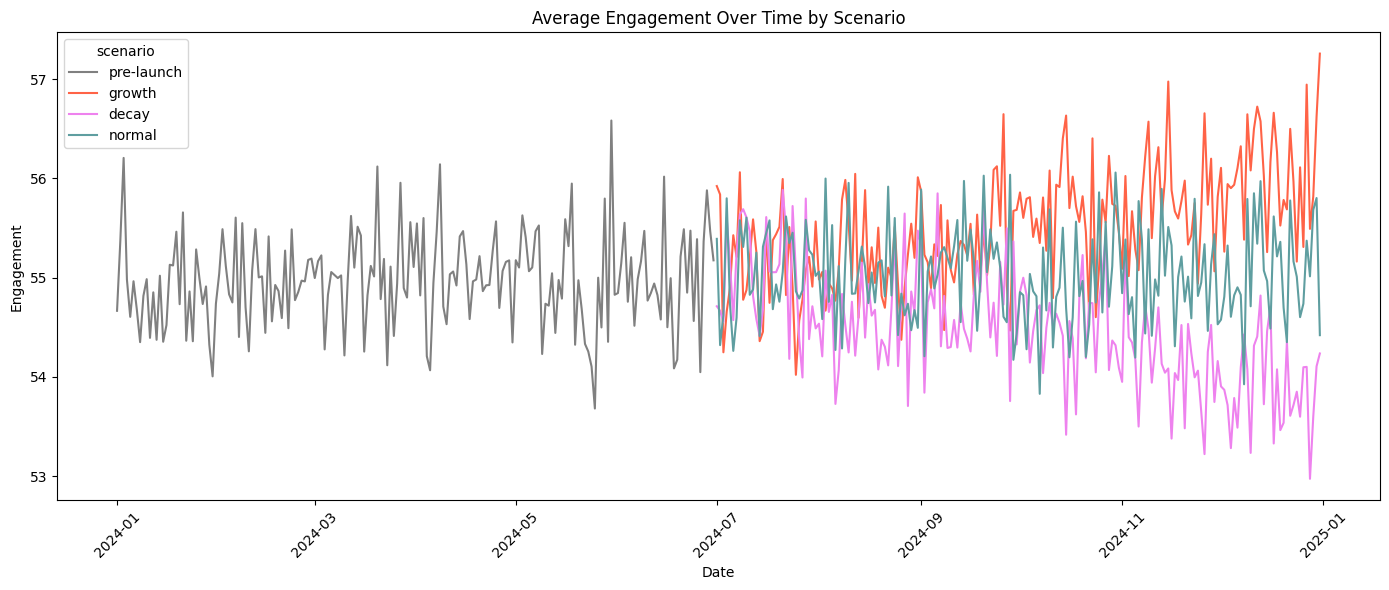

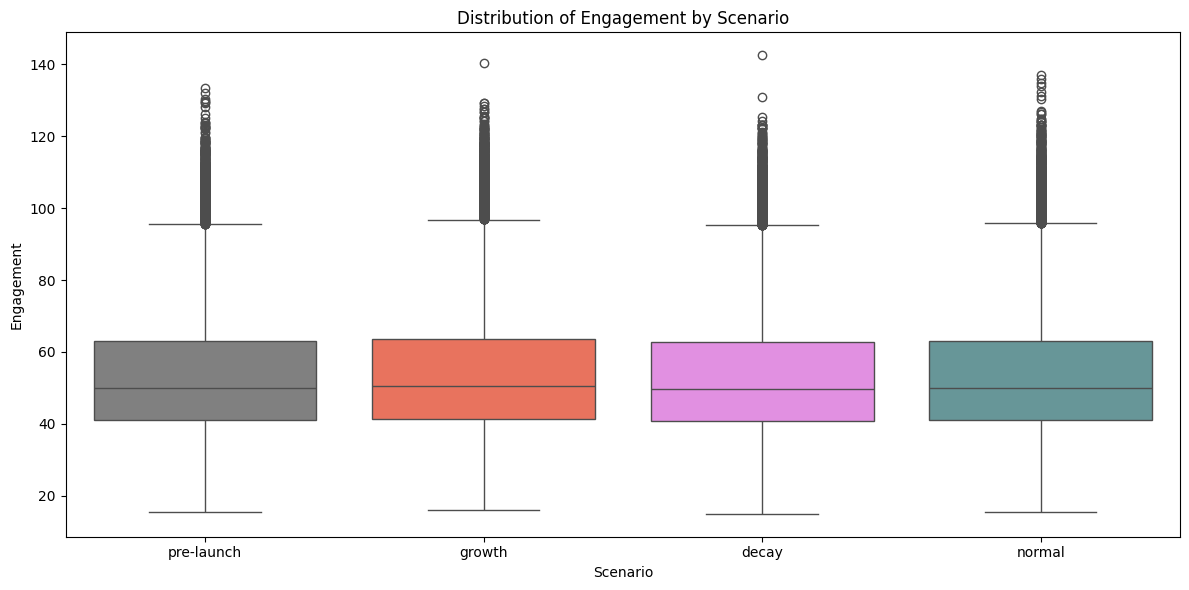

In [110]:
# Engagement trend
plt.figure(figsize=(14, 6))
sns.lineplot(data=combined_all, x="Date", y="Engagement", hue="scenario", estimator="mean", errorbar=None, palette=custom_palette)
plt.title("Average Engagement Over Time by Scenario")
plt.ylabel("Engagement")
plt.xlabel("Date")
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig(f"EDA Charts/engagement_trend.png", dpi=300) # Include
plt.show()

# Engagement distribution
plt.figure(figsize=(12, 6))
sns.boxplot(data=combined_all, x="scenario", y="Engagement", hue="scenario", palette=custom_palette, dodge=False)
plt.title("Distribution of Engagement by Scenario")
plt.ylabel("Engagement")
plt.xlabel("Scenario")
plt.legend([],[], frameon=False) 
plt.tight_layout()
plt.savefig(f"EDA Charts/engagement_distribution.png", dpi=300) # Don't include
plt.show()


In [111]:
combined_all.groupby("scenario")["Engagement"].describe() #include

,count,mean,std,min,25%,50%,75%,max
scenario,,,,,,,,
decay,18400.0,54.478461,19.965976,15.017394,40.891415,49.655184,62.652403,142.478302
growth,18400.0,55.521201,20.425662,15.972193,41.446827,50.543078,63.601311,140.424558
normal,18400.0,55.028030,20.304728,15.527852,41.137963,50.014662,63.023767,137.085694
pre-launch,18200.0,54.969195,20.228260,15.517542,41.171392,50.016650,62.947910,133.248215


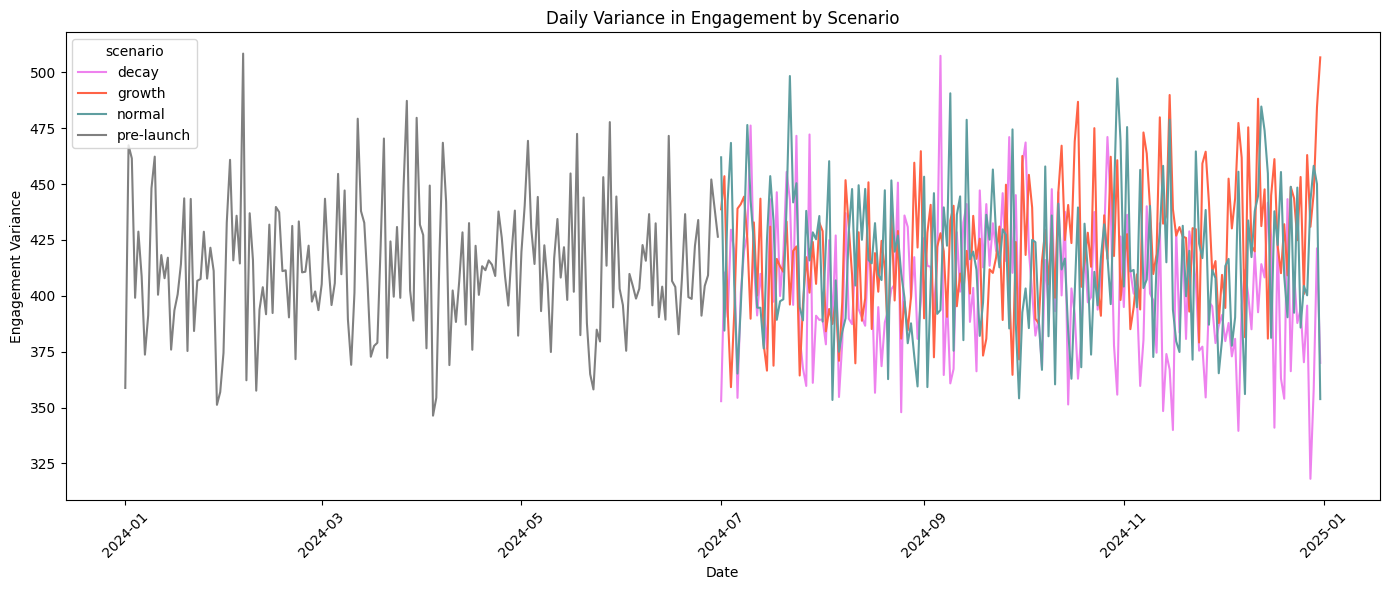

In [112]:
daily_var = combined_all.groupby(["scenario", "Date"])["Engagement"].var().reset_index()

plt.figure(figsize=(14, 6))
sns.lineplot(data=daily_var, x="Date", y="Engagement", hue="scenario",
             errorbar=None, palette=custom_palette)
plt.title("Daily Variance in Engagement by Scenario")
plt.ylabel("Engagement Variance")
plt.xlabel("Date")
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig(f"EDA Charts/daily_variance.png", dpi=300)
plt.show()
# probably dont need this

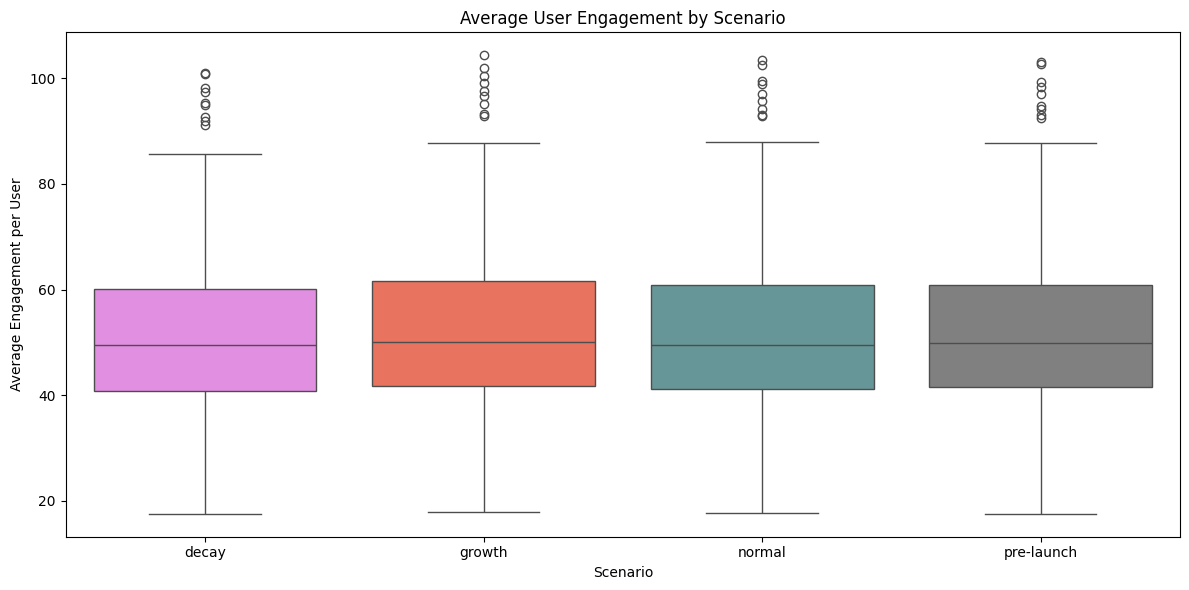

In [113]:
user_avg = combined_all.groupby(["scenario", "UserID"])["Engagement"].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.boxplot(data=user_avg, x="scenario", y="Engagement", hue="scenario",
            palette=custom_palette, dodge=False)
plt.title("Average User Engagement by Scenario")
plt.ylabel("Average Engagement per User")
plt.xlabel("Scenario")
plt.legend([], [], frameon=False)
plt.tight_layout()
plt.savefig(f"EDA Charts/user_avg_engagement.png", dpi=300)
plt.show()


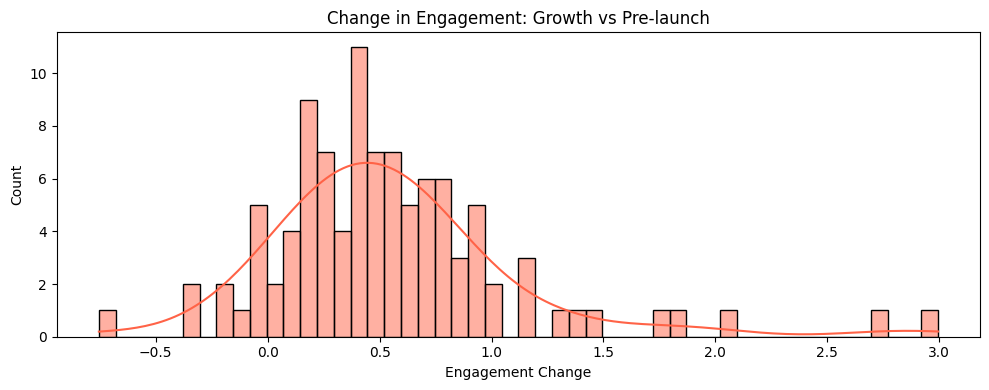

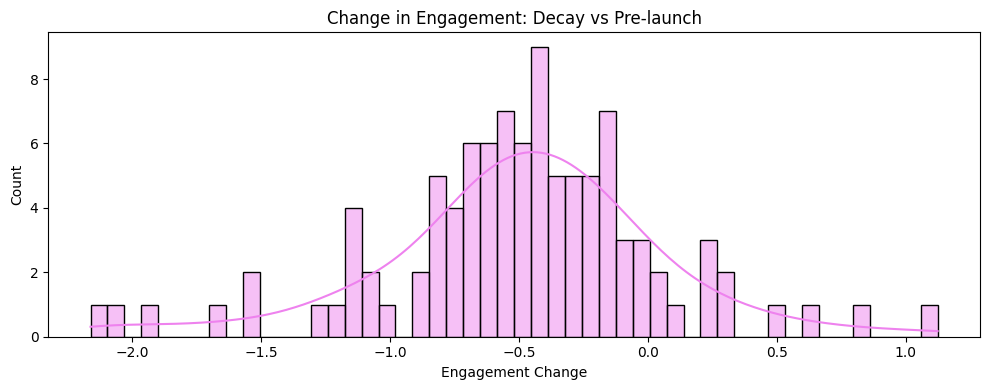

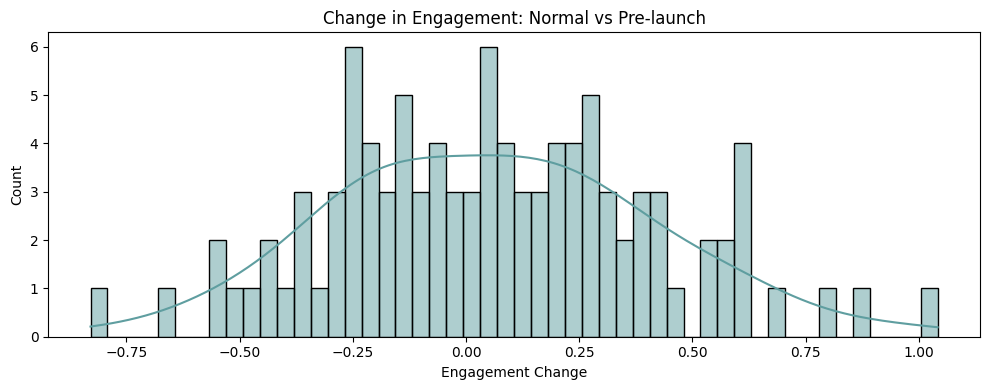

In [114]:
pre_eng = time_a.groupby("UserID")["Engagement"].mean()

for scen in ["growth", "decay", "normal"]:
    post = time_b_combined[time_b_combined["scenario"] == scen]
    post_eng = post.groupby("UserID")["Engagement"].mean()
    change = post_eng.subtract(pre_eng, fill_value=0)

    plt.figure(figsize=(10, 4))
    sns.histplot(change, bins=50, kde=True, color=custom_palette[scen])
    plt.title(f"Change in Engagement: {scen.capitalize()} vs Pre-launch")
    plt.xlabel("Engagement Change")
    plt.tight_layout()
    plt.savefig(f"EDA Charts/engagement_change_{scen}.png") # Include
    plt.show()